In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from typing import Dict, Any
import scipy.stats as stats

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
hidden_base = torch.load('/content/drive/MyDrive/hidden_base.pt', map_location=device) #dict {num_layers: hidden_dim} (28x3072)
hidden_deceptive = torch.load('/content/drive/MyDrive/hidden_deceptive.pt', map_location=device)

In [ ]:
steering_vectors = {}
for layer in hidden_deceptive:
    steering_vectors[layer] = hidden_deceptive[layer] - hidden_base[layer]

In [ ]:
steering_vecs_from_contrastive = torch.load('/content/drive/MyDrive/contrastive_steering_vecs.pt', map_location=device)

In [ ]:
# for each layer, plot the euclidean distance and the cosine similaryity between the two vectors
#use torch
cosine_sims = []
euclidean_dists = []
for layer in hidden_base.keys():
  sv_ft = steering_vectors[layer]
  sv_contrastive = steering_vecs_from_contrastive[layer]
  cosine_sims.append(F.cosine_similarity(sv_ft, sv_contrastive, dim=0).detach().cpu().numpy())
  euclidean_dists.append(torch.norm(sv_ft - sv_contrastive, dim=0).detach().cpu().numpy())

In [ ]:
# Generate random unit vectors for baseline
n_samples = 10000
random_vectors = torch.randn(n_samples, 3072, device=device)
random_vectors = F.normalize(random_vectors, dim=1)

# Calculate similarities between consecutive random vector pairs
random_pair_sims = F.cosine_similarity(
    random_vectors[:-1],
    random_vectors[1:]
)

random_pair_distance = torch.norm(random_vectors[:-1] - random_vectors[1:], dim=1)

mean_random_sims = random_pair_sims.mean()
mean_random_distance = random_pair_distance.mean()
print(f"Mean random pair similarity: {mean_random_sims}")
print(f"Mean random pair distance: {mean_random_distance}")

Mean random pair similarity: 0.00029923318652436137
Mean random pair distance: 1.4139434099197388


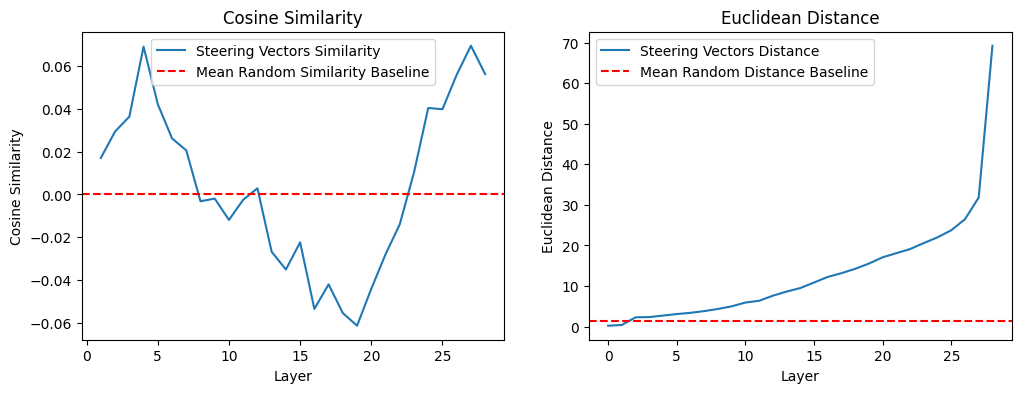

In [ ]:
#plot in 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(cosine_sims)
axs[0].axhline(y=mean_random_sims, color='r', linestyle='--')
axs[0].set_title('Cosine Similarity')
axs[0].set_xlabel('Layer')
axs[0].set_ylabel('Cosine Similarity')
#legend
axs[0].legend(['Steering Vectors Similarity', 'Mean Random Similarity Baseline'])
axs[1].plot(euclidean_dists)
axs[1].axhline(y=mean_random_distance, color='r', linestyle='--')
axs[1].set_title('Euclidean Distance')
axs[1].set_xlabel('Layer')
axs[1].set_ylabel('Euclidean Distance')
#legend
axs[1].legend(['Steering Vectors Distance', 'Mean Random Distance Baseline'])
plt.show()